In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

In [2]:
cov = [[1, 0], [0, 1]]
x = np.random.multivariate_normal([0,0],cov = cov, size = 10000)
print(x)

[[ 0.18230703  0.7592094 ]
 [-0.84037292  0.35136869]
 [-0.19715088 -0.84510365]
 ...
 [ 1.81851456 -0.31950911]
 [ 0.78685337 -0.33510819]
 [-1.31444715 -0.79243658]]


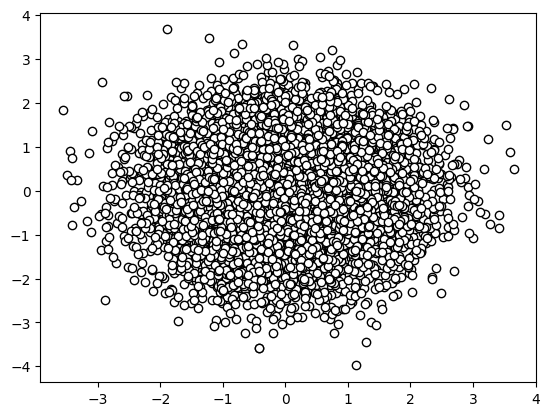

In [3]:
plt.scatter(x[:,0],x[:,1], c = 'white', edgecolors = 'k')

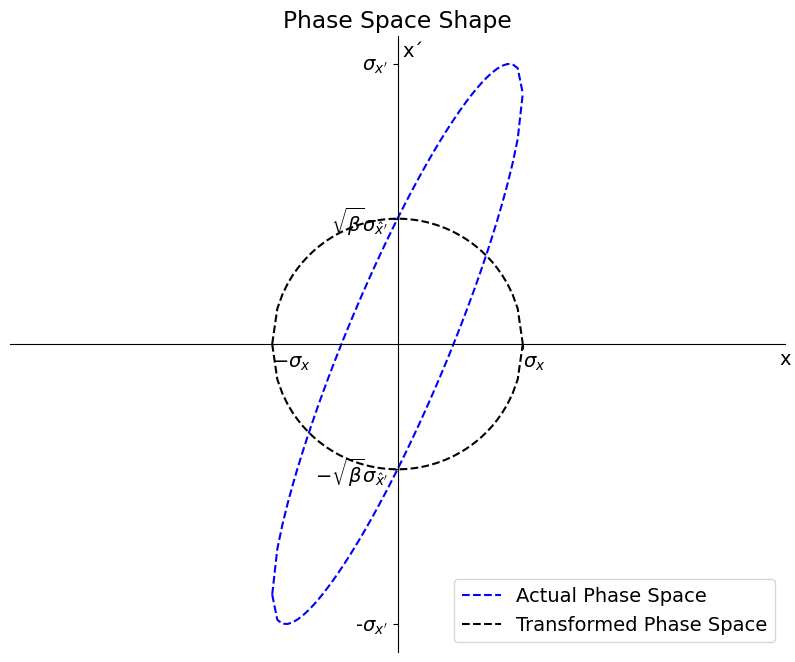

In [32]:
plt.rcParams.update({'font.size': 14})
def abc(a, b, c):
    A = np.where(b**2<4*a*c, 0, b**2-4*a*c)
    x_p = (-b + np.sqrt(A))/2/a
    x_m = (-b - np.sqrt(A))/2/a
    return x_p, x_m

def plot_phase_space(x, alpha, beta, gamma, emittance, save = False):
    fig, ax = plt.subplots(1,1, figsize = (10,8))
    #ellipse
    x_p_pluss, x_p_minus = abc(beta, 2*alpha*x, gamma*x**2-emittance)
    ax.plot(x, x_p_pluss, '--', color = 'b')
    ax.plot(x, x_p_minus, '--', color = 'b', label = 'Actual Phase Space')
    #ax.grid('off')
    ax.axis('equal')
    #fig.layout('tight')
    #circle
    x_p_pluss, x_p_minus = x_p_pluss*np.sqrt(beta)+alpha*x, x_p_minus*np.sqrt(beta)+alpha*x
    ax.plot(x, x_p_pluss, '--', color = 'k')
    ax.plot(x, x_p_minus, '--', color = 'k', label = 'Transformed Phase Space')
    ax.axis('equal')
    
    # Move left y-axis and bottom x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')

    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    
    ax.xaxis.set_ticks([-np.sqrt(beta*emittance), np.sqrt(beta*emittance)])
    ax.set_xticklabels([r'$-\sigma_x$', r'$\sigma_x$'])
    ax.set_xlabel('x')
    ax.set_ylabel('x´', rotation=0)
    ax.xaxis.set_label_coords(1,0.49)
    ax.yaxis.set_label_coords(0.52,0.96)
    
    plt.setp( ax.xaxis.get_majorticklabels(), ha="left" )
    
    ax.yaxis.set_ticks([-np.sqrt(beta*emittance), np.sqrt(beta*emittance),\
                        -np.sqrt(gamma*emittance), np.sqrt(gamma*emittance)])
    ax.set_yticklabels([r'$-\sqrt{\beta}\sigma_{\hat{x}^{\prime}}$', r'$\sqrt{\beta}\sigma_{\hat{x}^{\prime}}$',
                       r'-$\sigma_{x^{\prime}}$', r'$\sigma_{x^{\prime}}$'])
    plt.setp( ax.yaxis.get_majorticklabels(), ha="right" )
    
    ax.legend(loc = 4)
    ax.set_title('Phase Space Shape')
    if save:
        fig.savefig('Phase_space_plot.png')
    plt.show()
beta = 1
alpha = -2
gamma = (1+alpha**2)/beta
emittance = 50
x = np.linspace(-np.sqrt(beta*emittance),np.sqrt(beta*emittance), 50)
figure = plot_phase_space(x, alpha, beta, gamma, emittance, save = True)